In [169]:
library(pls)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value
1,1990.00,2102.00,1.00,0.77,2.00,1.00,27603.00,203200.00
2,1986.00,1740.00,1.50,0.06,3.00,1.00,27604.00,119096.00
3,1955.0,795.0,1.0,0.3,1.0,0.0,27610.0,71666.0
4,1983.00,1152.00,1.00,0.68,2.00,0.00,27616.00,131103.00
5,2003.00,1404.00,1.00,39.38,2.00,0.00,27519.00,4904102.00
6,1924.00,1829.00,1.50,0.25,3.00,1.00,27607.00,496425.00


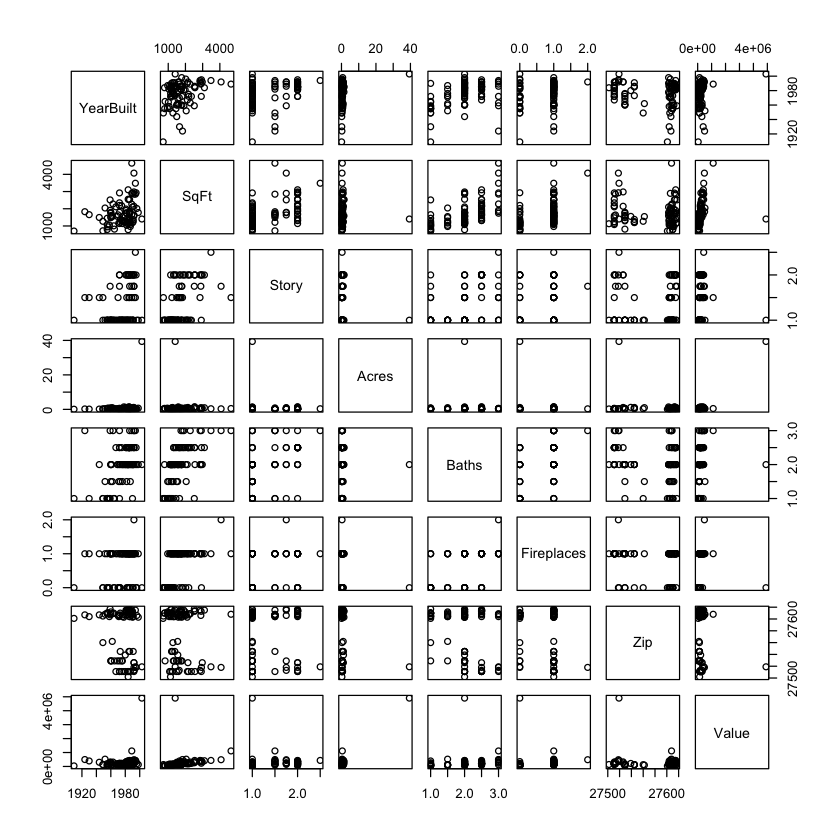

In [226]:
data = read.csv('/Users/syzhang/STATS202F16Kaggle/data/train.csv', header=T)
testInput = read.csv('/Users/syzhang/STATS202F16Kaggle/data/test.csv', header=T)
names(testInput)[length(testInput)]="Zip"
data$Baths[is.na(data$Baths)] = round(mean(data$Baths, na.rm=T),0)
data = data[,-1]
# data$Zip = as.factor(data$Zip) # cannot be performed in PCR, which results in near zero standard deviation
head(data)
pairs(data)

In [234]:
set.seed(1)
trainIdx = sample(1:nrow(data), round(nrow(data)*3/4, 0))
testIdx = (-trainIdx)
data$Zip <- NULL  # remove zip from the variable
data$Story <- NULL 
# had really bad negative r2 if zip is kept as a numeric variable 
# cannot use as.factor to make it categorical due to “Scaling with (near) zero standard deviation”
x.train = data[trainIdx,]
x.test = data[testIdx,]
y.train = data[trainIdx,]$Value
y.test = data[testIdx,]$Value

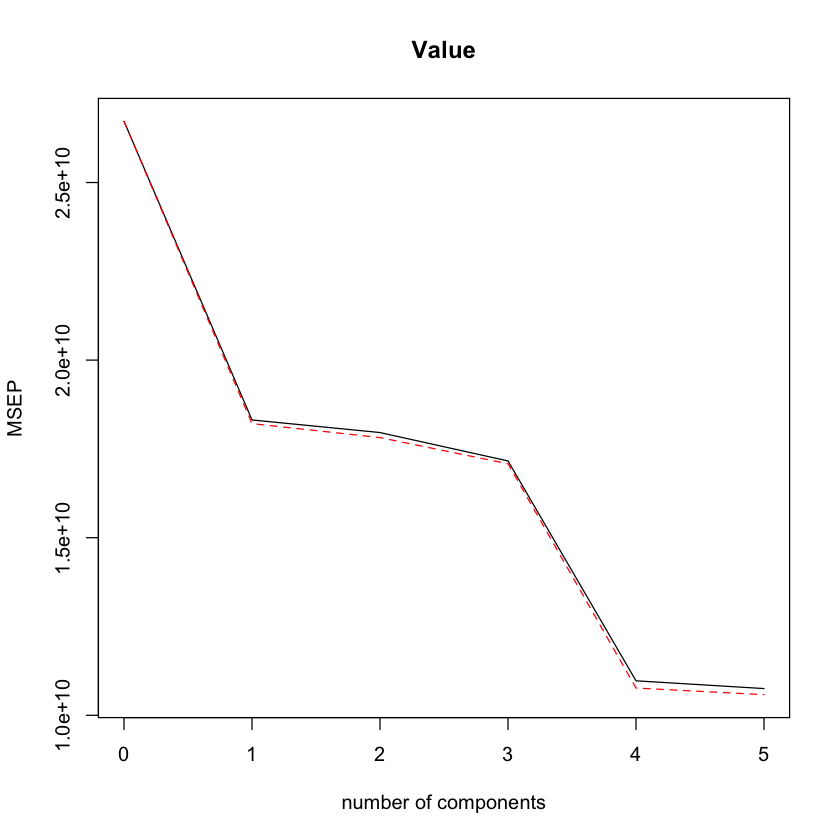

In [235]:
pcr.fit <- pcr(Value~., data=x.train, scale=TRUE, validation ="CV")
validationplot(pcr.fit, val.type="MSEP")

In [236]:
summary(pcr.fit)

Data: 	X dimension: 68 5 
	Y dimension: 68 1
Fit method: svdpc
Number of components considered: 5

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps
CV          163472   135334   134018   131001   104741   103693
adjCV       163472   134953   133486   130696   103764   102860

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps
X        49.36    68.99    84.56    93.84   100.00
Value    36.60    38.62    44.00    68.96    69.91


In [237]:
# choose ncomps = 4

In [240]:
pcr.pred=predict(pcr.fit, x.test, ncomp = 4)
compare <- data.frame("predicted" = pcr.pred, "Actual" = y.test)
compare

,Value.4.comps,Actual
5,717844.2,4904102.0
8,282019.8,243092.0
16,157212.2,213300.0
19,450540,410025
23,76896.19,119323.00
27,166739.9,180856.0
35,52260.66,90091.00
39,376252.2,313633.0
40,179486.4,215196.0
44,107696.9,122742.0


In [241]:
var = mean((mean(y.test) - y.test)^2)
pcr.mse = mean((pcr.pred - y.test)^2)
pcr.r2 = 1 - pcr.mse/var

In [243]:
pcr.r2
pcr.mse

[1] 0.1738983

[1] 798873301440

In [ ]:
# if leave zip out only, we get r2 of 0.12639 for PCR